<a href="https://colab.research.google.com/github/Mariac-db/Deep-Learning-/blob/main/Generador_im%C3%A1genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2021-08-06 20:13:13--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 108.177.127.128, 172.217.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  54.9MB/s    in 2.6s    

2021-08-06 20:13:16 (54.9 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [3]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In short: The training set is the data that is used to tell the neural network model that 'this is what a horse looks like', 'this is what a human looks like' etc

In [4]:
#   El uso de los directorios es clave ya que estos permiten  codificar imagenes en subdirectorios los cuales contienen una etiqueta respectiva de si es humano o caballo
#Directorio de entranamiento con imágenes con caballos
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directorio de entrenamiento con imágenes de humanos 
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [5]:
#Imprimiendo el nombre de las imágenes con el que están almacenadas y etiquetadas en el directorio:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse43-2.png', 'horse07-8.png', 'horse45-9.png', 'horse04-7.png', 'horse15-2.png', 'horse08-3.png', 'horse24-1.png', 'horse16-6.png', 'horse02-2.png', 'horse10-2.png']
['human09-10.png', 'human16-18.png', 'human17-19.png', 'human17-28.png', 'human03-13.png', 'human02-22.png', 'human11-28.png', 'human08-18.png', 'human12-18.png', 'human11-04.png']


In [7]:
#Imprimiendo el total de etiquetas o contenido en cada directorio
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

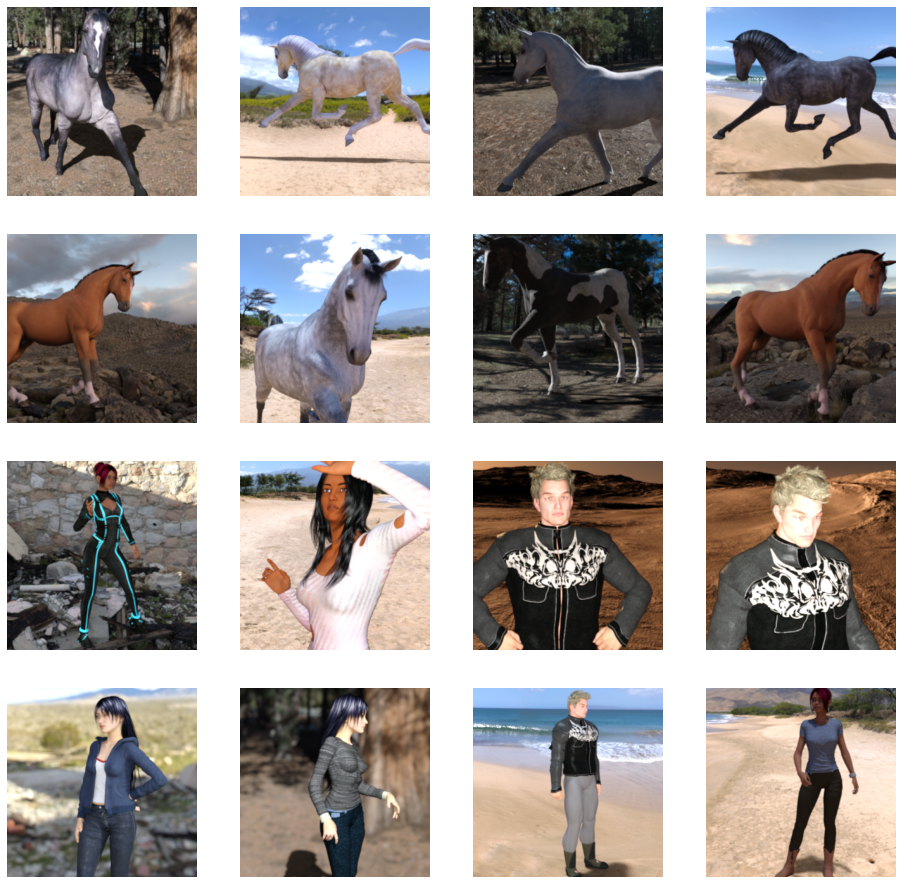

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [9]:
import tensorflow as tf

In [10]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution, 32 filtros, kernel 3x3
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), #cada cuatro pixeles elige el mayor
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")



Es necesario configurar los generadores de datos que leerán imágenes en nuestras carpetas de origen, las convertirán en tensores float32 y las alimentarán (con sus etiquetas) a nuestra red. Tendremos un generador para las imágenes de entrenamiento y otro para las imágenes de validación. Nuestros generadores producirán lotes de imágenes de tamaño 300x300 y sus etiquetas (binarias). 

 Para cargar el generador del directorio de las imagenes de entrenamieneto se podría de hacer de dos posibles maneras, la primera a partir del directorio(nomre).flow(data, labels) o bien que sea con,  .flow_from_directory(directory) 

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Todas las imagenes serán normalizadas y para ello se divide por la ponderación máxima de la escala de color, es decir, 255.0
train_datagen = ImageDataGenerator(rescale=1/255)

# Ahora tenemos que cargar el generador para cargar  las imágenes de entrenamiento de flujo en lotes de 128 usando el generador train_datagen
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 1027 images belonging to 2 classes.


**Es importante recordar que la pérdida y la precisión son una gran indicación del progreso del entrenamiento. Es adivinar la clasificación de los datos de entrenamiento y luego compararlos con la etiqueta conocida y calcular el resultado. La precisión es la parte de las conjeturas correctas.**

In [13]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 58s 7s/step - loss: 0.9183 - accuracy: 0.4883
Epoch 2/15
8/8 [==============================] - 56s 7s/step - loss: 0.6441 - accuracy: 0.6229
Epoch 3/15
8/8 [==============================] - 58s 7s/step - loss: 0.9977 - accuracy: 0.6596
Epoch 4/15
8/8 [==============================] - 55s 7s/step - loss: 0.4635 - accuracy: 0.8076
Epoch 5/15
8/8 [==============================] - 57s 7s/step - loss: 0.1853 - accuracy: 0.9143
Epoch 6/15
8/8 [==============================] - 57s 7s/step - loss: 0.3990 - accuracy: 0.8632
Epoch 7/15
8/8 [==============================] - 57s 7s/step - loss: 0.2172 - accuracy: 0.9121
Epoch 8/15
8/8 [==============================] - 56s 7s/step - loss: 0.1652 - accuracy: 0.9366
Epoch 9/15
8/8 [==============================] - 56s 7s/step - loss: 0.3997 - accuracy: 0.8432
Epoch 10/15
8/8 [==============================] - 56s 7s/step - loss: 0.2838 - accuracy: 0.9143
Epoch 11/15
8/8 [======================

In [14]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Saving cruella.jpg to cruella (1).jpg
[0.]
cruella.jpg is a horse


el tamalo de img es
<PIL.Image.Image image mode=RGB size=300x300 at 0x7F3967282990>
el nombre de las capas son
['max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'max_pooling2d_3', 'conv2d_4', 'max_pooling2d_4', 'flatten', 'dense', 'dense_1']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


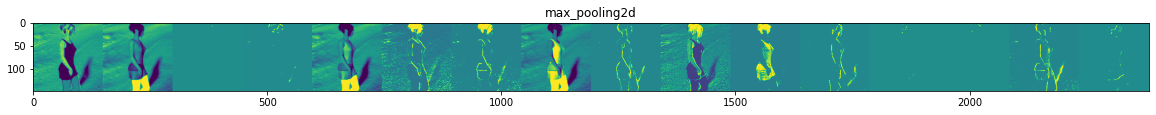

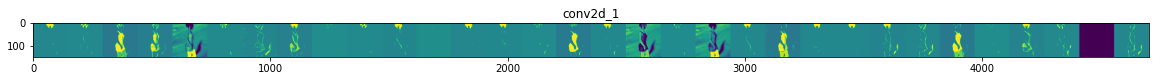

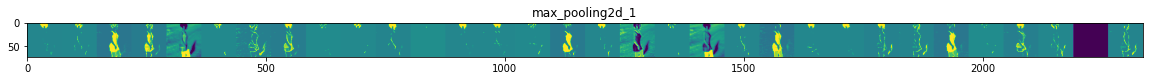

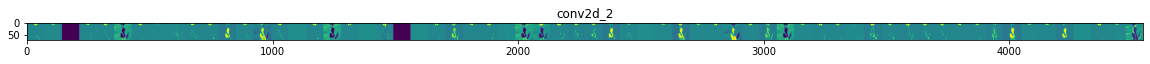

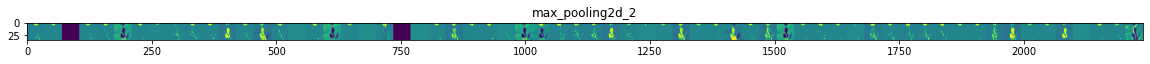

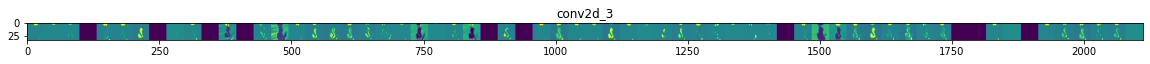

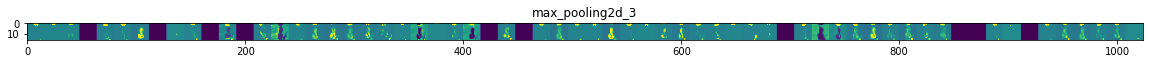

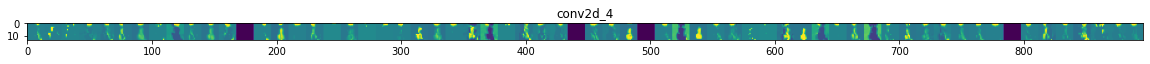

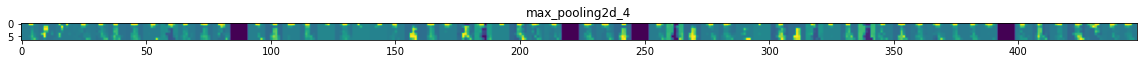

In [18]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# La capa de entrada son todos los pixeles de  la imagen 
# las capas ocultas son las predefinidas anterioemente en el modelo

successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))
print('el tamalo de img es')  # this is a PIL image
print(img)
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]
print('el nombre de las capas son')
print(layer_names)


# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)